# **Reinforcement Learning - 2021**
# **COMS4047A/COMS7053A**
### **Bandits Assignment**
***
### **Justin Abrams 2483251**
### **Ashton Naidoo 2519631** 
### **Riekert Holder 2517888**
### **Humbulani Colbert Nekhumbe 2340639**
***

# Library Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from fractions import Fraction

# Used for learning rate
alpha = 0.1

# Number of iterations for algorithms to run for
iterations = 1000

# Amount of iterations to average by for graphs
avg_amount = 100


# Multi-Arm Bandit Test-Bed Setup

In [ ]:


class Arm:
    def __init__(self, mean, std=1):
        self.mean = mean
        self.std = std

    def pull(self):
        return np.random.normal(self.mean, self.std)

    def print(self):
        print("Mean =", self.mean, "\tVariance =", self.std)

class Mab:
    def __init__(self, number_of_arms):
        self.number_of_arms = number_of_arms

        # Used for arm creation only mean 0, var 3
        arm_creator = Arm(0, std=np.sqrt(3))
        self.arms = list()
        for i in range(number_of_arms):
            # Sample number from arm_creator to be 
            # used as the mean for the new arm
            self.arms.append(Arm((arm_creator.pull())))

    def pull_arm(self, arm_number):
        return self.arms[arm_number].pull()

    def print(self):
        for arm in self.arms:
            arm.print()



# 𝜖 - Greedy Function Definition

In [ ]:


def eps_greedy(e, mab, return_avg=0):
    num_actions = mab.number_of_arms
    q_values = np.zeros(num_actions)
    rewards = list()
    num_explored = 0
    num_exploited = 0
    for _ in range(iterations):
        # Epsilon greedy statergy chooses best action with 
        # propability 1-e and random with probability e
        p = random.uniform(0, 1)

        if (p < e):
            #random
            a = round(random.uniform(0, num_actions-1))
            num_explored += 1
            # print("random")
        else:
            #best
            a = np.argmax(q_values)
            num_exploited += 1
            # print("best")

        # Take action and recieve reward
        reward = mab.pull_arm(a)
        # print("reward =", reward)

        q_values[a] = q_values[a] + alpha*(reward - q_values[a])

        rewards.append(reward)
    print(f"\nEpsilon = {e} -- Explored: {num_explored}" )
    print(f"Epsilon = {e} -- Exploited: {num_exploited}" )
    print(f"Epsilon = {e} -- Total reward: {sum(rewards)}" )
    return average_return(rewards, return_avg)




# Greedy with Optimistic Initialisation Function Defintiton

In [ ]:
def optimistic(q_value_start, mab, return_avg=0):
    num_actions = mab.number_of_arms
    q_values = np.zeros(num_actions)
    for q in range(num_actions):
        q_values[q] = q_value_start
    
    rewards = list()

    # this is a change
    for _ in range(iterations):
        
        a = np.argmax(q_values)

        # Take action and recieve reward
        reward = mab.pull_arm(a)

        # Update action stats and q_values for action
        q_values[a] = q_values[a] + alpha*(reward - q_values[a])

        rewards.append(reward)
    print(f"Q = {q_value_start} --- Total rewards earned: {sum(rewards)}")
    #print(f"Q = {q_value_start} -- Overall winrate: {sum(rewards)/iterations}")
    return average_return(rewards, return_avg)

# Upper Confidence Bound (UCB) Function Defintion

In [ ]:


def ucb(c, mab, return_avg=0):
    num_actions = mab.number_of_arms

    # Expected rewards per action
    q_values = np.zeros(num_actions)

    # Number of actions taken
    n = 1

    # Number of actions per arm 
    n_per_arm = np.zeros(num_actions)

    rewards = list()

    for _ in range(iterations):
        
        # avoid divde by zero error
        a = np.argmax(q_values + c * np.sqrt(np.log(n)/(n_per_arm + 1))) 

        # Take action and recieve reward
        reward = mab.pull_arm(a)

        # Update counts
        n += 1
        n_per_arm[a] += 1
        # Update action stats and q_values for action
        q_values[a] = q_values[a] + ((reward - q_values[a]) / n_per_arm[a])

        rewards.append(reward)
    
    print(f"UCB = {c} --- Total rewards earned: {sum(rewards)}")
    return average_return(rewards, return_avg)




In [ ]:
def average_return(results, return_average=0):
    if return_average:
        total_reward = 0
        for reward in results:
            total_reward += reward
        return total_reward/len(results)
    else:
        total_reward = 0
        plotable_rewards = list()
        for i in range(len(results)):
            total_reward += results[i]
            if (i > avg_amount):
                total_reward -= results[i-avg_amount]
                avg = total_reward/avg_amount
            else:
                avg = total_reward/(i+1)
            plotable_rewards.append(avg)
        
        return plotable_rewards

# Comparison Plot
A summary comparison plot of rewards over first 1000 steps for all three algorithms



Epsilon = 0.1 -- Explored: 114
Epsilon = 0.1 -- Exploited: 886
Epsilon = 0.1 -- Total reward: 4558.354064254205
Q = 5 --- Total rewards earned: 5787.066574257613
UCB = 2 --- Total rewards earned: 5835.3781841700165


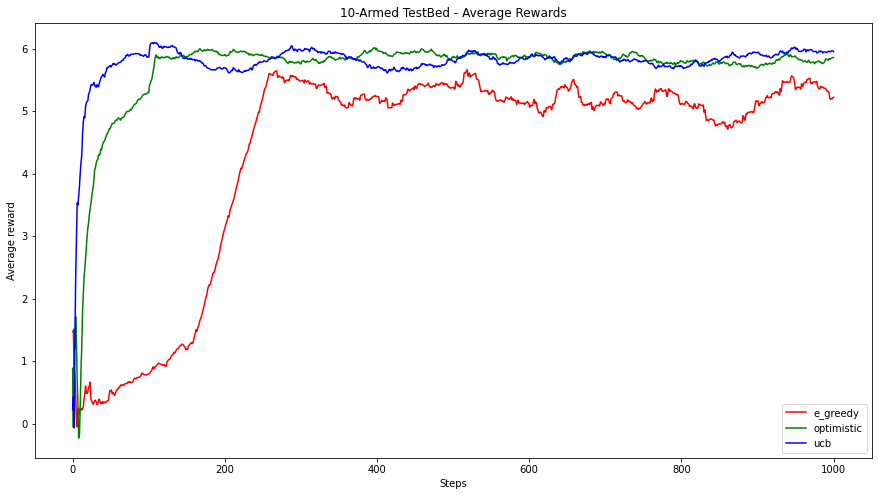

In [ ]:


m = Mab(10)

e  = 0.1
Q1 = 5
c  = 2

results = list()
results.append(eps_greedy(e, m))  # red
results.append(optimistic(Q1, m)) # green
results.append(ucb(c, m))         # blue

y = np.linspace(0, iterations, iterations)

colours = ['r', 'g', 'b']
labels = ['e_greedy', 'optimistic', 'ucb']

plt.figure(figsize=(15, 8))

for i in range(len(results)):
    plt.plot(y, results[i], colours[i], label = labels[i])


plt.title("10-Armed TestBed - Average Rewards")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()



# Reward Plot Over Time
A plot of reward over time (averaged over 100 runs each) on the same
axes, for 𝜖 greedy with 𝜖=0.1, greedy with 𝑄1=5, and UCB with 𝑐=2.

E-Greedy Results

Epsilon = 0.0078125 -- Explored: 12
Epsilon = 0.0078125 -- Exploited: 988
Epsilon = 0.0078125 -- Total reward: 821.4712423328708

Epsilon = 0.015625 -- Explored: 16
Epsilon = 0.015625 -- Exploited: 984
Epsilon = 0.015625 -- Total reward: 780.0015534167171

Epsilon = 0.03125 -- Explored: 32
Epsilon = 0.03125 -- Exploited: 968
Epsilon = 0.03125 -- Total reward: 1981.0232698112145

Epsilon = 0.0625 -- Explored: 59
Epsilon = 0.0625 -- Exploited: 941
Epsilon = 0.0625 -- Total reward: 1800.6620436685794

Epsilon = 0.125 -- Explored: 124
Epsilon = 0.125 -- Exploited: 876
Epsilon = 0.125 -- Total reward: 1629.4431541044798

Epsilon = 0.25 -- Explored: 245
Epsilon = 0.25 -- Exploited: 755
Epsilon = 0.25 -- Total reward: 1257.0715874995658

Optimistic Greedy Results
Q = 0.25 --- Total rewards earned: 1853.859984179625
Q = 0.5 --- Total rewards earned: 1770.6558375956274
Q = 1 --- Total rewards earned: 1886.8912924517256
Q = 2 --- Total rewards earned: 2228.28839755764
Q = 4 ---

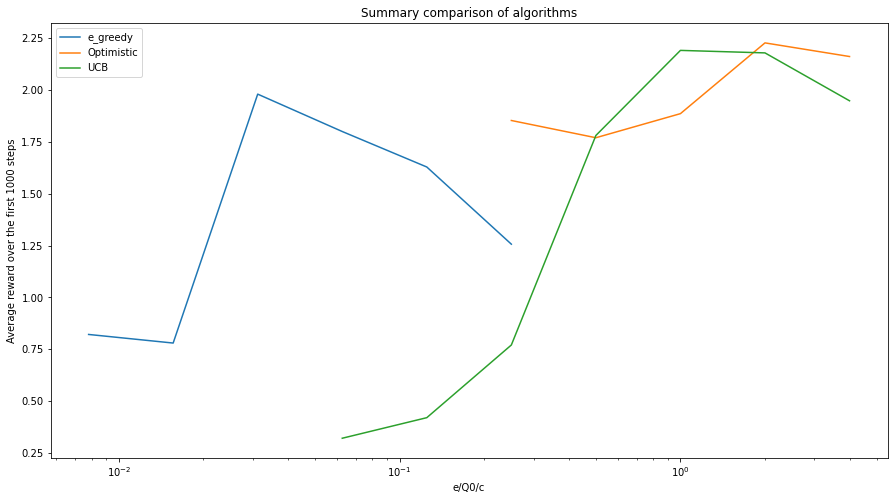

In [ ]:
# Vary Hyperparams for each algorithm
e_list = [1.0/128, 1.0/64, 1.0/32, 1.0/16, 1.0/8, 1.0/4]
results = list()
print("========================================================")
print("E-Greedy Results")
print("========================================================")

for i in range(len(e_list)):
    results.append(eps_greedy(e_list[i], m, return_avg=1))

plt.figure(figsize=(15, 8))
plt.plot(e_list, results, label = "e_greedy")

Q_list = [1.0/4, 0.5, 1, 2, 4]
results = list()
print("\n========================================================")
print("Optimistic Greedy Results")
print("========================================================")
for i in range(len(Q_list)):
    results.append(optimistic(Q_list[i], m, return_avg=1))
plt.plot(Q_list, results, label = "Optimistic")

c_list = [1.0/16, 1.0/8, 0.25, 0.5, 1, 2, 4]
results = list()
print("\n========================================================")
print("UCB Results")
print("========================================================")
for i in range(len(c_list)):
    results.append(ucb(c_list[i], m, return_avg=1))

c_list_ticks = [Fraction(i).limit_denominator() for i in c_list] 
plt.xticks(np.unique(c_list), c_list_ticks)

plt.semilogx()#remove for previous x axis scaling
plt.plot(c_list, results, label = "UCB")
    
plt.title('Summary comparison of algorithms')    
plt.xlabel("e/Q0/c")
plt.ylabel("Average reward over the first 1000 steps")
plt.legend()
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()

